In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
laptop_data = pd.read_csv("laptops.csv")

In [3]:
#print 1st five rows of laptop data
laptop_data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
#checking shape
laptop_data.shape

(1303, 12)

In [5]:
#checking information
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
#checking null values
laptop_data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
#checking duplicate values
laptop_data.duplicated().sum()

0

In [8]:
#summary statistics of the numerical columns
laptop_data.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [9]:
#dropping unnecessary columns
laptop_data.drop(columns = ["Unnamed: 0"], inplace = True)

In [10]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
#removing "GB" from the "Ram" column and "kg" from the "Weight" column
laptop_data["Ram"] = laptop_data["Ram"].str.replace("GB","")

laptop_data["Weight"] = laptop_data["Weight"].str.replace("kg","")

In [12]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
#converting the "Ram" column to integer type
laptop_data["Ram"] = laptop_data["Ram"].astype("int32")

#convert the "Weight" column to float type
laptop_data["Weight"] = laptop_data["Weight"].astype("float32")

In [14]:
#displaying information about the laptop_data DataFrame
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<Axes: xlabel='Price', ylabel='Density'>

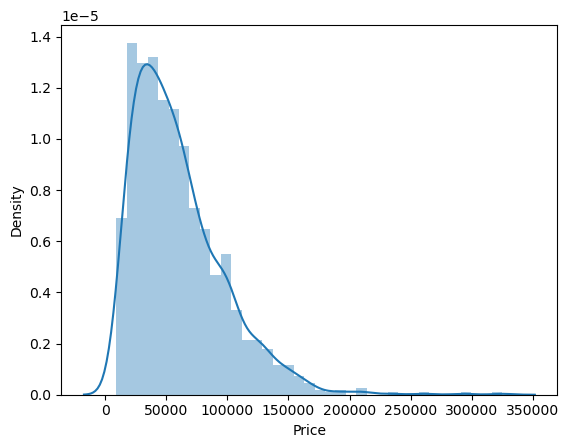

In [15]:
#plotting a distribution plot for the "Price" column
sns.distplot(laptop_data["Price"])

<Axes: >

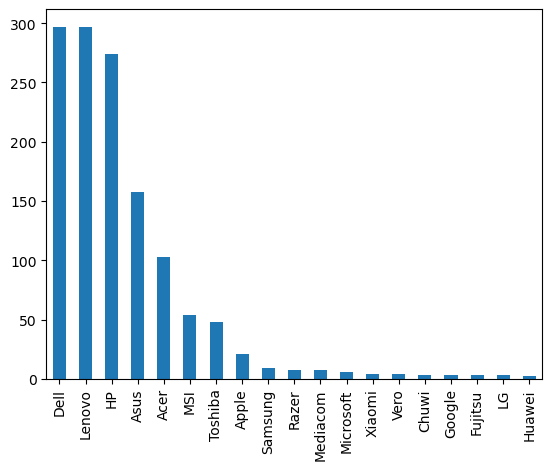

In [16]:
#visualizing the counts of unique values in the "Company" column using a bar plot
laptop_data["Company"].value_counts().plot(kind = "bar")

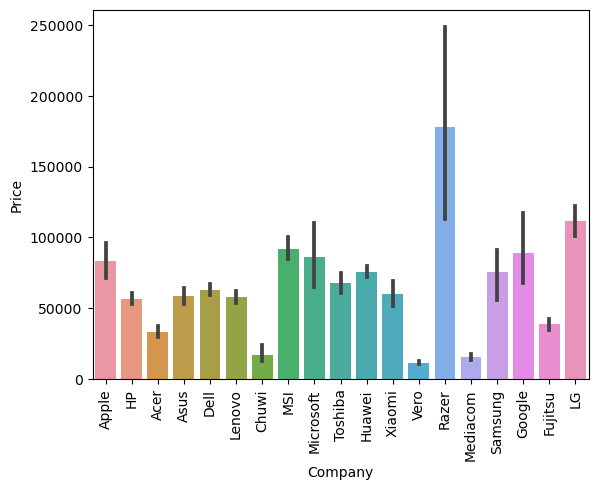

In [17]:
#creating a bar plot using seaborn to visualize the relationship between "Company" and "Price" columns
sns.barplot(x = laptop_data["Company"],y = laptop_data["Price"])

#rotating the x-axis labels vertically for better readability
plt.xticks(rotation = "vertical")

#displaying the plot
plt.show()

<Axes: >

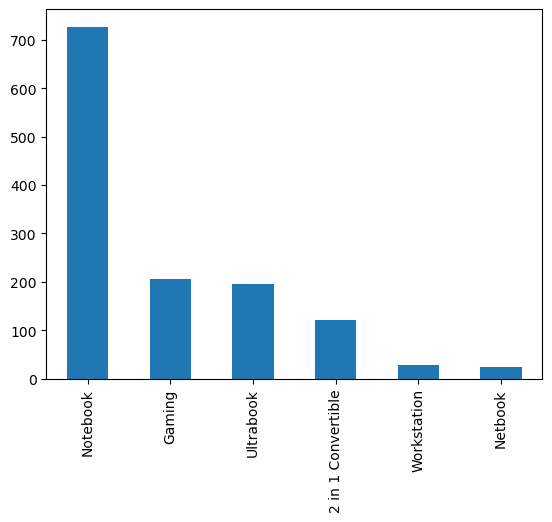

In [18]:
#visualizing the counts of unique values in the "TypeName" column using a bar plot
laptop_data["TypeName"].value_counts().plot(kind = "bar")

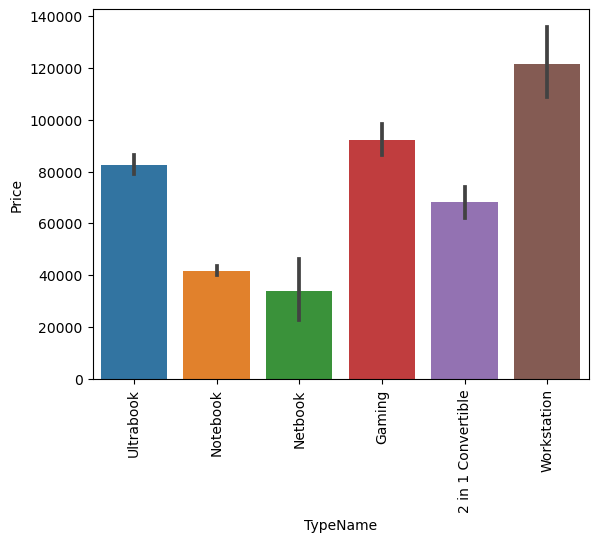

In [19]:
#using barplot to visualize the relationship between "TypeName" and "Price" columns
sns.barplot(x = laptop_data["TypeName"], y = laptop_data["Price"])
plt.xticks(rotation = "vertical")
plt.show()

<Axes: xlabel='Inches', ylabel='Density'>

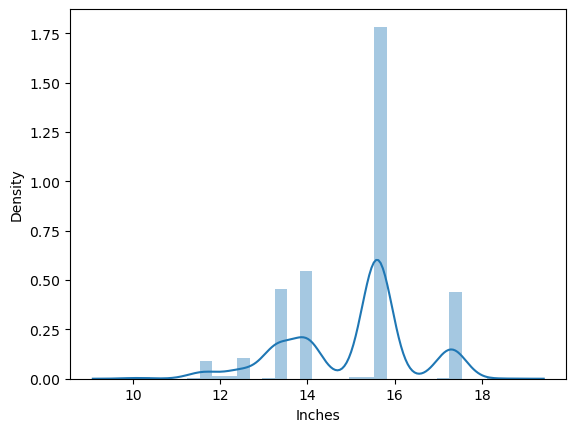

In [20]:
#plotting a distribution plot for the "Inches" column
sns.distplot(laptop_data["Inches"])

<Axes: xlabel='Inches', ylabel='Price'>

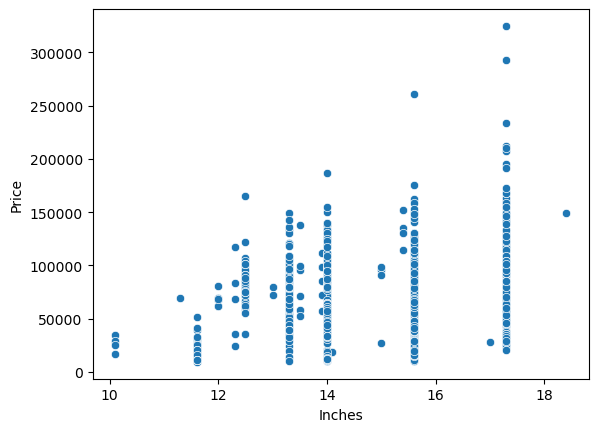

In [21]:
#creating a scatter plot to visualize the relationship between "Inches" and "Price" columns
sns.scatterplot(x = laptop_data["Inches"], y = laptop_data["Price"])

In [22]:
laptop_data["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [23]:
#adding a new column "Touchscreen" to the laptop_data DataFrame based on the presence of "Touchscreen" in the "ScreenResolution" column
laptop_data["Touchscreen"] = laptop_data["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [24]:
#displaying a random sample of 5 rows from the "laptop_data" DataFrame
laptop_data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
259,Lenovo,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,512GB SSD,Nvidia GeForce GTX 1050M,Windows 10,2.00,90522.72,1
34,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,8,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35,53173.44,0
324,Acer,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8,256GB SSD,AMD Radeon RX 540,Windows 10,2.20,35111.52,0
302,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Nvidia GeForce GTX 940M,Windows 10,2.80,34578.72,0
1129,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.35,60153.12,0


<Axes: >

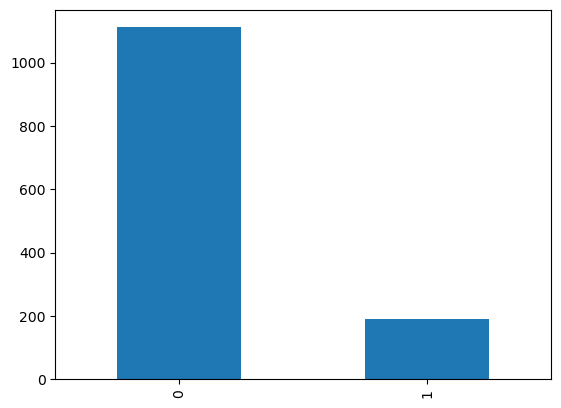

In [25]:
#counting the occurrences of each unique value in the "Touchscreen" column and creating a bar plot
laptop_data["Touchscreen"].value_counts().plot(kind = "bar")

<Axes: xlabel='Touchscreen', ylabel='Price'>

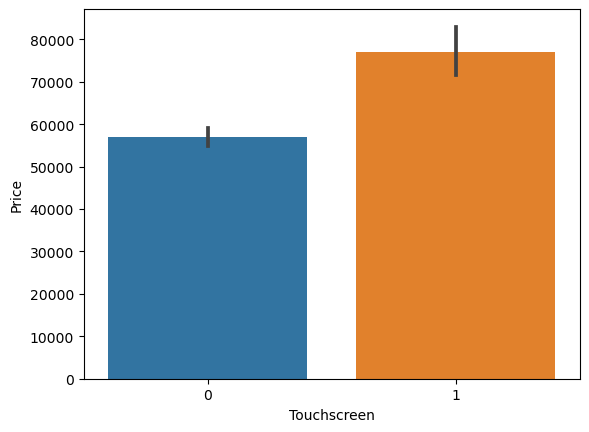

In [26]:
#barplot to visualize the relationship between "Touchscreen" and "Price" columns
sns.barplot(x = laptop_data["Touchscreen"],y = laptop_data["Price"])

In [27]:
#adding a new column "Ips" to the laptop_data DataFrame based on the presence of "IPS" in the "ScreenResolution" column
laptop_data["Ips"] = laptop_data["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

In [28]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: >

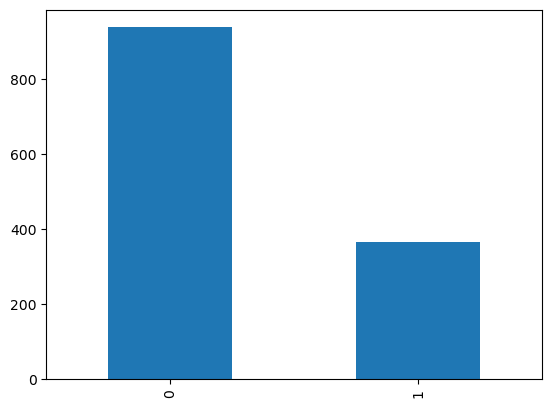

In [29]:
#counting occurrences of each unique value in the "Ips" column and creating a bar plot
laptop_data["Ips"].value_counts().plot(kind = "bar")

<Axes: xlabel='Ips', ylabel='Price'>

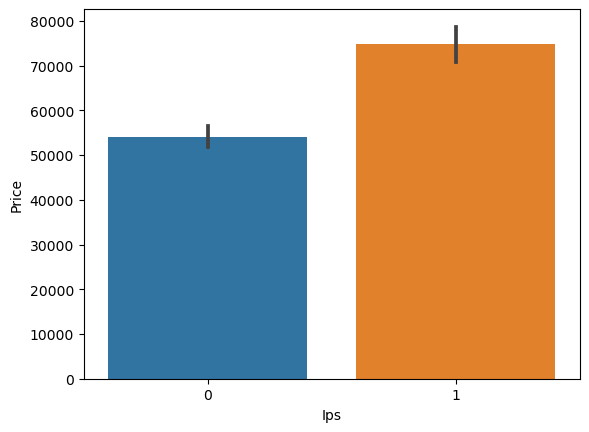

In [30]:
#creating a bar plot to visualize the relationship between "Ips" and "Price" columns
sns.barplot(x = laptop_data["Ips"], y = laptop_data["Price"])

In [31]:
#splitting the "ScreenResolution" column in laptop_data based on the "x" character,with a maximum of 1 split, and creating a new DataFrame called new_laptop_data
new_laptop_data = laptop_data["ScreenResolution"].str.split("x",n = 1,expand = True)

In [32]:
#creating new columns "X_resolution" and "Y_resolution" in the laptop_data DataFrame based on the split values from the "ScreenResolution" column
laptop_data["X_resolution"] = new_laptop_data[0]
laptop_data["Y_resolution"] = new_laptop_data[1]

In [33]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [34]:
#replacing commas and extracting numerical values from "X_resolution" column
laptop_data["X_resolution"] = laptop_data["X_resolution"].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [35]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
#converting the "X_resolution" and "Y_resolution" columns to integer data type
laptop_data["X_resolution"] = laptop_data["X_resolution"].astype("int")
laptop_data["Y_resolution"] = laptop_data["Y_resolution"].astype("int")

In [37]:
#information about the DataFrame
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_resolution      1303 non-null   int32  
 14  Y_resolution      1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [38]:
#calculating correlation coefficients between "Price" and all other columns in laptop_data
laptop_data.corr()["Price"]

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
Ips             0.252208
X_resolution    0.556529
Y_resolution    0.552809
Name: Price, dtype: float64

In [39]:
#calculate the pixel density per inch (ppi) for each laptop and add it as a new column in the laptop_data DataFrame
laptop_data["ppi"] = (((laptop_data["X_resolution"]**2) + (laptop_data["Y_resolution"]**2))**0.5/laptop_data["Inches"]).astype("float")

In [40]:
#calculating correlation
laptop_data.corr()["Price"]

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
Ips             0.252208
X_resolution    0.556529
Y_resolution    0.552809
ppi             0.473487
Name: Price, dtype: float64

In [41]:
#dropping specified columns
laptop_data.drop(columns = ["ScreenResolution", "Inches", "X_resolution", "Y_resolution"],inplace = True)

In [42]:
laptop_data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [43]:
#counting the occurrences of each unique value in the "Cpu" column
laptop_data["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [44]:
#extracting the first three words from each entry in the "Cpu" column and creating a new column "Cpu Variety" with the concatenated result.
laptop_data["Cpu_Variety"] = laptop_data["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [45]:
laptop_data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Variety
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [46]:
def fetch_processor(text):
    #checking if the text is one of the specified Intel Core processors
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    else:
        #If the text starts with "Intel," categorize as "Other Intel Processor"
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            #otherwise, categorize as "AMD Processor"
            return "AMD Processor"

In [47]:
#creating a new column "Cpu_Brand"
laptop_data["Cpu_Brand"] = laptop_data["Cpu_Variety"].apply(fetch_processor)

In [48]:
laptop_data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Variety,Cpu_Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: >

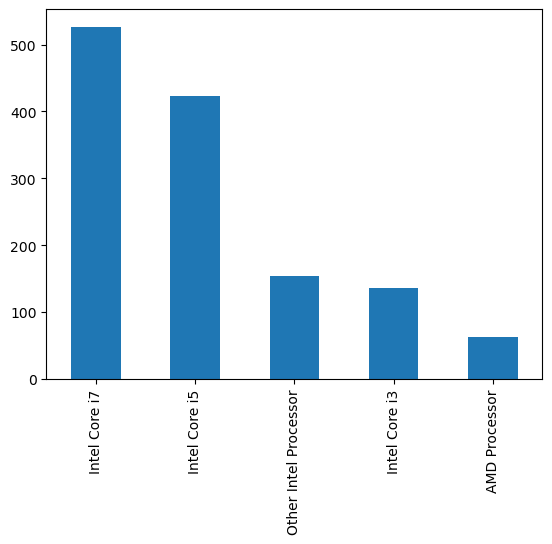

In [49]:
#generate a bar plot for the counts of each unique value in the "Cpu_Brand" column
laptop_data["Cpu_Brand"].value_counts().plot(kind = "bar")

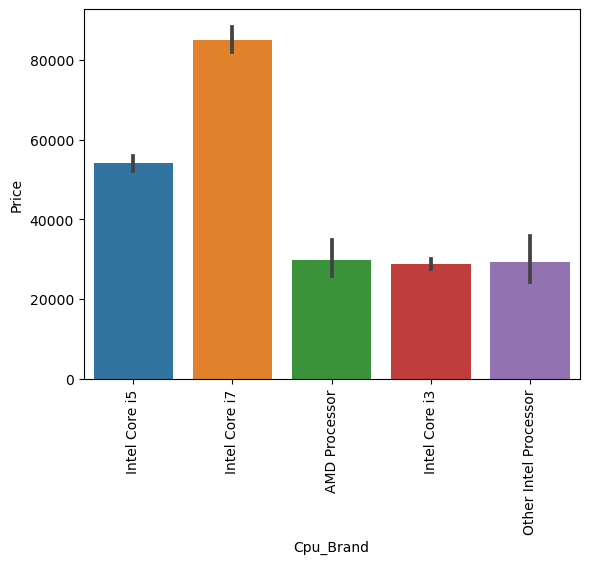

In [50]:
#visualizing the relationship between "Cpu_Brand" and "Price" column
sns.barplot(x = laptop_data["Cpu_Brand"], y = laptop_data["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [51]:
#dropping the specified columns
laptop_data.drop(columns = ["Cpu", "Cpu_Variety"], inplace=True)

In [52]:
laptop_data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: >

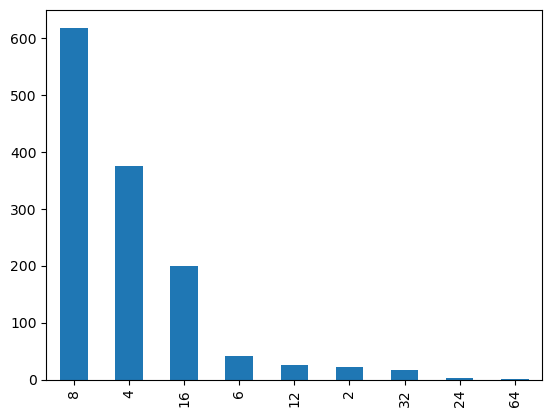

In [53]:
#generating a bar plot for "Ram" column 
laptop_data["Ram"].value_counts().plot(kind = "bar")

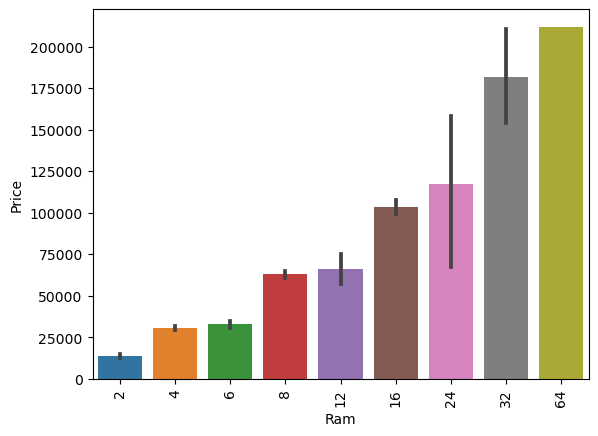

In [54]:
#visualizing the relationship between "Ram" and "Price" column
sns.barplot(x = laptop_data["Ram"], y = laptop_data["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [55]:
#displaying the counts of each unique value in the "Memory" column
laptop_data["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [56]:
#removing trailing '.0' from the "Memory" column and replacing "GB" with an empty string
laptop_data["Memory"] = laptop_data["Memory"].astype(str).replace("\.0", '', regex=True)
laptop_data["Memory"] = laptop_data["Memory"].str.replace("GB", '')

#replacing "TB" with "000" in the "Memory" column
laptop_data["Memory"] = laptop_data["Memory"].str.replace("TB", "000")

#splitting the "Memory" column into two columns using the '+' symbol as a delimiter
new_data = laptop_data["Memory"].str.split("+", n = 1, expand = True)

In [57]:
#extracting the first part of the split "Memory" column and removing leading/trailing whitespaces
laptop_data["first"] = new_data[0]
laptop_data["first"] = laptop_data["first"].str.strip()

#creating new binary columns based on the presence of specific keywords in the "first" column
laptop_data["Layer1HDD"] = laptop_data["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_data["Layer1SSD"] = laptop_data["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_data["Layer1Hybrid"] = laptop_data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_data["Layer1Flash_Storage"] = laptop_data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

#removing non-digit characters from the "first" column
laptop_data["first"] = laptop_data["first"].str.replace(r'\D', '')

In [58]:
#extracting the second part of the split "Memory" column and filling NaN values with "0"
laptop_data["second"]= new_data[1]
laptop_data["second"].fillna("0", inplace = True)

#creating new binary columns based on the presence of specific keywords in the "second" column
laptop_data["Layer2HDD"] = laptop_data["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_data["Layer2SSD"] = laptop_data["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_data["Layer2Hybrid"] = laptop_data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_data["Layer2Flash_Storage"] = laptop_data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

#removing non-digit characters from the "second" column
laptop_data["second"] = laptop_data["second"].str.replace(r'\D', '')

In [59]:
#converting the "first" and "second" columns in the laptop_data DataFrame to integer type
laptop_data["first"] = laptop_data["first"].astype(int)
laptop_data["second"] = laptop_data["second"].astype(int)

In [60]:
#calculating the total storage for different types (HDD, SSD, Hybrid, Flash Storage) based on the values in the "first" and "second" columns

#total HDD storage is the sum of the product of "first" and "Layer1HDD" and the product of "second" and "Layer2HDD"
laptop_data["HDD"] = (laptop_data["first"]*laptop_data["Layer1HDD"]+laptop_data["second"]*laptop_data["Layer2HDD"])

#total SSD storage is the sum of the product of "first" and "Layer1SSD" and the product of "second" and "Layer2SSD"
laptop_data["SSD"] = (laptop_data["first"]*laptop_data["Layer1SSD"]+laptop_data["second"]*laptop_data["Layer2SSD"])

#total Hybrid storage is the sum of the product of "first" and "Layer1Hybrid" and the product of "second" and "Layer2Hybrid"
laptop_data["Hybrid"] = (laptop_data["first"]*laptop_data["Layer1Hybrid"]+laptop_data["second"]*laptop_data["Layer2Hybrid"])

# Total Flash Storage is the sum of the product of "first" and "Layer1Flash_Storage" and the product of "second" and "Layer2Flash_Storage"
laptop_data["Flash_Storage"] = (laptop_data["first"]*laptop_data["Layer1Flash_Storage"]+laptop_data["second"]*laptop_data["Layer2Flash_Storage"])

In [61]:
laptop_data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,Layer1Flash_Storage,second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,1,0,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,256,0,0


In [62]:
#removing unnecessary columns from the laptop_data DataFrame
laptop_data.drop(columns = ["first", "second", "Layer1HDD", "Layer1SSD", "Layer1Hybrid", "Layer1Flash_Storage", "Layer2HDD", "Layer2SSD", 
                            "Layer2Hybrid", "Layer2Flash_Storage"], inplace = True)

In [63]:
laptop_data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [64]:
#removing the memory column
laptop_data.drop(columns = ["Memory"],inplace = True)

In [65]:
laptop_data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [66]:
#calculating the correlation coefficients between the "Price" column and all other columns 
laptop_data.corr()["Price"]

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [67]:
#removing the "Hybrid" & "Flash_Stroge" columns
laptop_data.drop(columns = ["Hybrid","Flash_Storage"], inplace = True)

In [68]:
laptop_data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [69]:
laptop_data["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [70]:
#extracting the GPU brand from the "Gpu" column and creating a new column "Gpu_Brand" with the extracted values
laptop_data["Gpu_Brand"] = laptop_data["Gpu"].apply(lambda x:x.split()[0])

In [71]:
laptop_data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [72]:
laptop_data["Gpu_Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

In [73]:
#filtering rows in the DataFrame where the "Gpu_Brand" column is not equal to "ARM"
laptop_data = laptop_data[laptop_data["Gpu_Brand"] != "ARM"]

In [74]:
laptop_data["Gpu_Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_Brand, dtype: int64

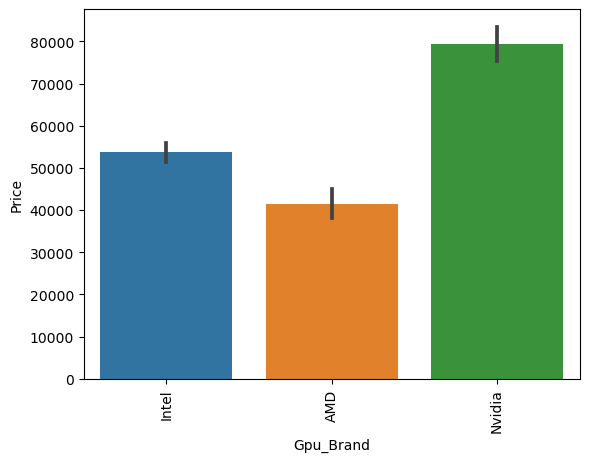

In [75]:
#visualizing the relationship between GPU brands and laptop prices
sns.barplot(x = laptop_data["Gpu_Brand"], y = laptop_data["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [76]:
#removing the "Gpu" column
laptop_data.drop(columns = ["Gpu"], inplace = True)

In [77]:
laptop_data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [78]:
laptop_data["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

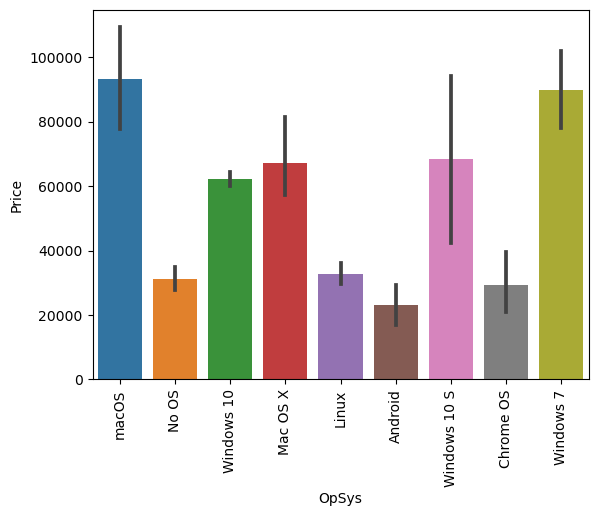

In [79]:
#visualizing the relationship between "OpSys" and "Price"
sns.barplot(x = laptop_data["OpSys"], y = laptop_data["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [80]:
#defining a function named operating_systems that takes an input parameter 'inp'
def operating_systems(inp):
    #checking if the input is "Windows 10", "Windows 7", or "Windows 10 S"
    if inp == "Windows 10" or inp == "Windows 7" or inp == "Windows 10 S":
        #if true, returning "Windows"
        return "Windows"
    #checking if the input is "macOS" or "Mac OS X"
    elif inp == "macOS" or inp == "Mac OS X":
        #if true, returning "Mac"
        return "Mac"
    else:
        #if none of the above conditions are met, returning "Others/Linux/No OS"
        return "Others/Linux/No OS"

In [81]:
#adding a new column "Operating_Systems" to the DataFrame based on the "OpSys" column
laptop_data["Operating_Systems"] = laptop_data["OpSys"].apply(operating_systems)

In [82]:
laptop_data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,Gpu_Brand,Operating_Systems
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/Linux/No OS
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [83]:
#dropping the "OpSys" column
laptop_data.drop(columns = ["OpSys"], inplace = True)

In [84]:
laptop_data.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,Gpu_Brand,Operating_Systems
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/Linux/No OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


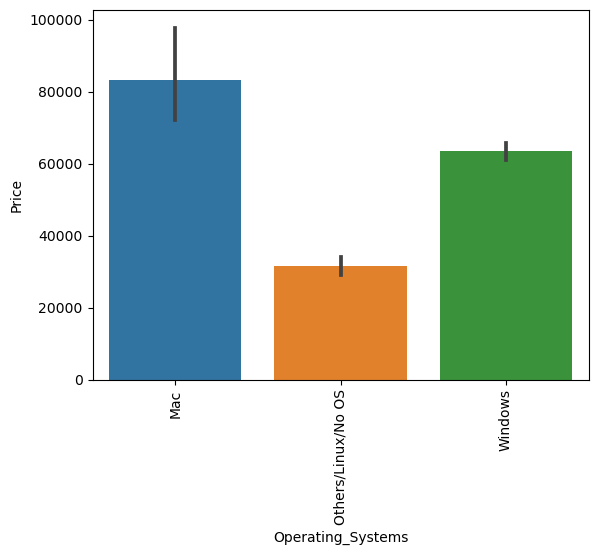

In [85]:
#visualizing the relationship between "Operating_Systems" and "Price" using a bar plot
sns.barplot(x = laptop_data["Operating_Systems"], y = laptop_data["Price"])
plt.xticks(rotation = "vertical")
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

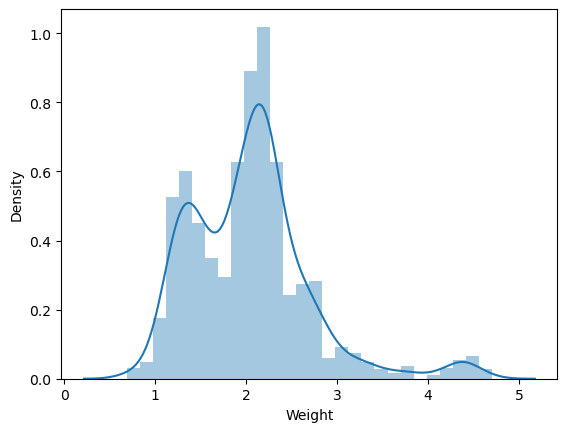

In [86]:
#creating a distribution plot for the "Weight" column
sns.distplot(laptop_data["Weight"])

<Axes: xlabel='Weight', ylabel='Price'>

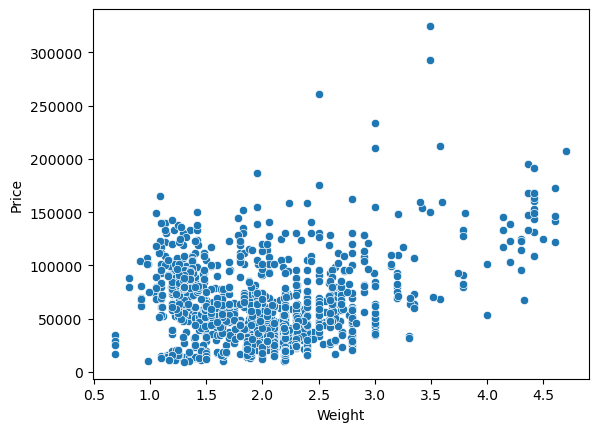

In [87]:
#visualizing the relationship between "Weight" and "Price" using scatter plot
sns.scatterplot(x = laptop_data["Weight"], y = laptop_data["Price"])

In [88]:
#calculating the correlation between "Price" and other columns
laptop_data.corr()["Price"]

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<Axes: >

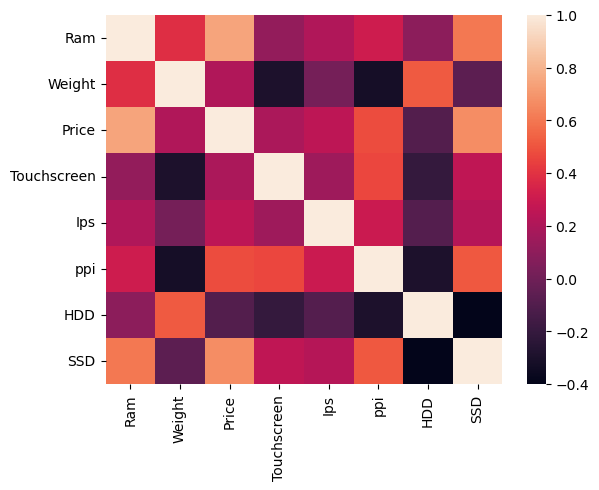

In [89]:
#creating a heatmap to visualize the correlation matrix
sns.heatmap(laptop_data.corr())

<Axes: xlabel='Price', ylabel='Density'>

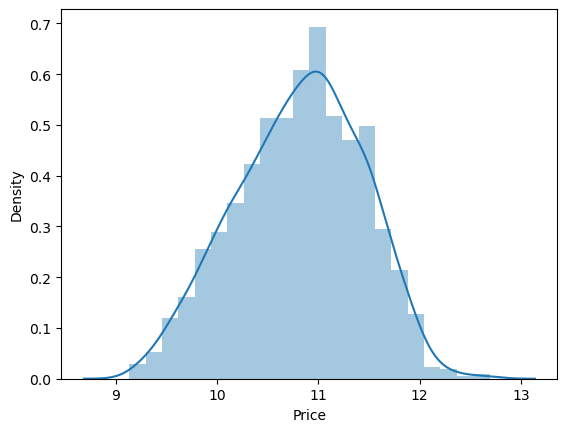

In [90]:
#distribution plot for the "Price" column
sns.distplot(np.log(laptop_data["Price"]))

In [91]:
#extracting features (X) and target variable (y) for the machine learning model
X = laptop_data.drop(columns = ["Price"])
y = np.log(laptop_data["Price"])

In [92]:
#printing the contents of the DataFrame "X"
print(X)

     Company            TypeName  Ram  Weight  Touchscreen  Ips         ppi  \
0      Apple           Ultrabook    8    1.37            0    1  226.983005   
1      Apple           Ultrabook    8    1.34            0    0  127.677940   
2         HP            Notebook    8    1.86            0    0  141.211998   
3      Apple           Ultrabook   16    1.83            0    1  220.534624   
4      Apple           Ultrabook    8    1.37            0    1  226.983005   
...      ...                 ...  ...     ...          ...  ...         ...   
1298  Lenovo  2 in 1 Convertible    4    1.80            1    1  157.350512   
1299  Lenovo  2 in 1 Convertible   16    1.30            1    1  276.053530   
1300  Lenovo            Notebook    2    1.50            0    0  111.935204   
1301      HP            Notebook    6    2.19            0    0  100.454670   
1302    Asus            Notebook    4    2.20            0    0  100.454670   

                  Cpu_Brand   HDD  SSD Gpu_Brand   

In [93]:
#printing the contents of the DataFrame "y"
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [94]:
#splitting the data into training and testing sets using the train_test_split function
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

In [95]:
#displaying the shapes of the X, X_train, and X_test DataFrame
print(X.shape, X_train.shape, X_test.shape)

(1302, 12) (1106, 12) (196, 12)


### Linear Regression

In [96]:
#define a ColumnTransformer to apply OneHotEncoder to specified columns and keep the remaining columns unchanged
step1 = ColumnTransformer(transformers=[
    ("col_transform", OneHotEncoder(sparse=False, drop="first"), [0, 1, 7, 10, 11])], remainder="passthrough")

#creating a LinearRegression model.
step2 = LinearRegression()

#creating a pipeline with two steps: column transformation and linear regression.
pipe1 = Pipeline([
    ("step1", step1),
    ("step2", step2)])

#fit the pipeline on the training data
pipe1.fit(X_train, y_train)

#predictions on the test set
y_pred = pipe1.predict(X_test)

#printing the R2 score and Mean Absolute Error of the predictions
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 score: 0.8073277448418701
MAE: 0.21017827976428766


### Lasso Regression

In [97]:
#column transformation: Apply OneHotEncoder to specified columns and keep the remaining columns unchanged
step1 = ColumnTransformer(transformers=[
    ("col_transform", OneHotEncoder(sparse=False, drop="first"), [0,1,7,10,11])], remainder="passthrough")

#Lasso Regression model with a regularization parameter (alpha) set to 0.001
step2 = Lasso(alpha = 0.001)

#creating a pipeline with two steps: column transformation and Lasso Regression
pipe2 = Pipeline([
    ("step1",step1),
    ("step2",step2)])

#fit the pipeline on the training data
pipe2.fit(X_train, y_train)

#predictions on the test set
y_pred = pipe2.predict(X_test)

#printing the R2 score and Mean Absolute Error of the predictions
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 score: 0.8071853945317105
MAE: 0.21114361613472565


### SVM 

In [98]:
#column transformation: Apply OneHotEncoder to specified columns and keep the remaining columns unchanged
step1 = ColumnTransformer(transformers=[
    ("col_transform", OneHotEncoder(sparse=False, drop="first"), [0,1,7,10,11])], remainder="passthrough")

#creating an SVR (Support Vector Regression) model with a radial basis function kernel, C=10000, and epsilon=0.1
step2 = SVR(kernel = "rbf", C = 10000, epsilon = 0.1)

#creating a pipeline with two steps: column transformation and SVR
pipe3 = Pipeline([
    ("step1",step1),
    ("step2",step2)])

#fit the pipeline on the training data
pipe3.fit(X_train,y_train)

#predictions on the test set
y_pred = pipe3.predict(X_test)

#printing the R2 score and Mean Absolute Error of the predictions
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 score: 0.8083180902289917
MAE: 0.2023905942719158


### KNN

In [99]:
#column transformation: Apply OneHotEncoder to specified columns and keep the remaining columns unchanged
step1 = ColumnTransformer(transformers=[
    ("col_transform", OneHotEncoder(sparse=False, drop="first"), [0,1,7,10,11])], remainder="passthrough")

#KNN Regression model with the number of neighbors set to 5
step2 = KNeighborsRegressor(n_neighbors = 5)

#creating a pipeline with two steps: column transformation and KNN Regression
pipe4 = Pipeline([
    ("step1",step1),
    ("step2",step2)])

#fit the pipeline on the training data
pipe4.fit(X_train, y_train)

#predictions on the test set
y_pred = pipe4.predict(X_test)

#printing the R2 score and Mean Absolute Error of the predictions
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 score: 0.8021965448099826
MAE: 0.199716871754322


### Decision Tree

In [100]:
#column transformation: Apply OneHotEncoder to specified columns and keep the remaining columns unchanged
step1 = ColumnTransformer(transformers=[
    ("col_transform", OneHotEncoder(sparse=False, drop="first"), [0,1,7,10,11])], remainder="passthrough")

#Decision Tree Regression model with a maximum depth of 8
step2 = DecisionTreeRegressor(max_depth = 8)

#creating a pipeline with two steps: column transformation and Decision Tree Regression
pipe5 = Pipeline([
    ("step1",step1),
    ("step2",step2)])

#fit the pipeline on the training data
pipe5.fit(X_train,y_train)

#predictions on the test set
y_pred = pipe5.predict(X_test)

#printing the R2 score and Mean Absolute Error of the predictions
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 score: 0.848112815514066
MAE: 0.1786736475093029


### Random Forest

In [101]:
#column transformation: Apply OneHotEncoder to specified columns and keep the remaining columns unchanged
step1 = ColumnTransformer(transformers=[
    ("col_transform", OneHotEncoder(sparse=False, drop="first"), [0,1,7,10,11])], remainder="passthrough")

#Random Forest Regression model
step2 = RandomForestRegressor(n_estimators = 250,
                              random_state = 123,
                              max_samples = 0.7,
                              max_features = 0.1,
                              max_depth = 15)

#creating a pipeline with two steps: column transformation and Random Forest Regression
pipe6 = Pipeline([
    ("step1",step1),
    ("step2",step2)])

#fit the pipeline on the training data
pipe6.fit(X_train, y_train)

#predictions on the test set
y_pred = pipe6.predict(X_test)

#printing the R2 score and Mean Absolute Error of the predictions
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 score: 0.9030712965546246
MAE: 0.14758312262378043


### XgBoost

In [102]:
#column transformation: Apply OneHotEncoder to specified columns and keep the remaining columns unchanged
step1 = ColumnTransformer(transformers=[
    ("col_transform", OneHotEncoder(sparse=False, drop="first"), [0,1,7,10,11])], remainder="passthrough")

#XGBoost Regression model
step2 = XGBRegressor(n_estimators = 100, max_depth = 6, learning_rate = 0.1, subsample = 0.8, colsample_bytree = 0.8)

#creating a pipeline with two steps: column transformation and XGBoost Regression
pipe7 = Pipeline([
    ("step1",step1),
    ("step2",step2)])

#fit the pipeline on the training data
pipe7.fit(X_train,y_train)

#predictions on the test set
y_pred = pipe7.predict(X_test)

#printing the R2 score and Mean Absolute Error of the predictions
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 score: 0.8905894721263851
MAE: 0.15947417904055783


In [103]:
#Save the "laptop_data" object and the "pipe6"(RandomForest)pipeline using the pickle module
import pickle

#Dumping the "laptop_data" object into a file named "laptop_data.pkl"
pickle.dump(laptop_data,open("laptop_data.pkl","wb"))

#Dumping the "pipe6" pipeline into a file named "forest_model.pkl"
pickle.dump(pipe6,open("forest_model.pkl","wb"))